In [4]:
### Decision tree ###

# read data
import pandas as pd
import numpy as np
titanic = pd.read_csv("titanic.csv", sep = ",", encoding = "ISO-8859-1")

# convert string values to numeric
titanic['Pclass'] = np.where(titanic['Pclass'] == 'Upper', 2, 
                             np.where(titanic['Pclass'] == 'Middle', 1, 0))
titanic['Survived'] = np.where(titanic['Survived'] == 'Survived', 1, 0)
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)

# create dummy variables
dummies = pd.get_dummies(titanic['Embarked'])
titanic = pd.concat([titanic, dummies], axis=1) 

# print first five rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EmbarkC,EmbarkQ,EmbarkS
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,EmbarkS,0,0,1
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,EmbarkC,1,0,0
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,EmbarkS,0,0,1
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,EmbarkS,0,0,1
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,EmbarkS,0,0,1


In [5]:
### Decision tree model ###

from sklearn.tree import DecisionTreeClassifier as DTC

# define model
tree_model = DTC(criterion='entropy')

# fit model to data
clf = tree_model.fit(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                              'EmbarkC', 'EmbarkQ', 'EmbarkS']], titanic['Survived'])

# evaluate model accuracy
clf.score(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','EmbarkC', 
                   'EmbarkQ', 'EmbarkS']], titanic['Survived'])

0.9649122807017544

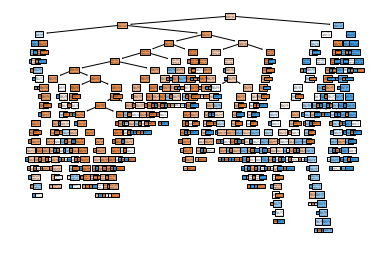

In [6]:
### Plot the decision tree ###

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plot_tree(clf, filled=True)
plt.show()

In [7]:
### Build a simpler model ###

tree_model = DTC(criterion='entropy', max_depth=3) 

# fit model to data
clf = tree_model.fit(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                              'EmbarkC', 'EmbarkQ', 'EmbarkS']], titanic['Survived'])

# evaluate model accuracy
clf.score(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','EmbarkC', 
                   'EmbarkQ', 'EmbarkS']], titanic['Survived'])

0.816933638443936

In [8]:
### Confusion matrix ###

from sklearn.metrics import classification_report
pred = clf.predict(titanic[['Pclass', 'Sex', 'Age', 'SibSp',
                            'Parch', 'Fare', 'EmbarkC', 'EmbarkQ', 'EmbarkS']])
print(classification_report(titanic['Survived'], pred, 
                            target_names=["Perished", "Survived"]))

              precision    recall  f1-score   support

    Perished       0.84      0.88      0.86       810
    Survived       0.78      0.72      0.75       501

    accuracy                           0.82      1311
   macro avg       0.81      0.80      0.80      1311
weighted avg       0.82      0.82      0.82      1311



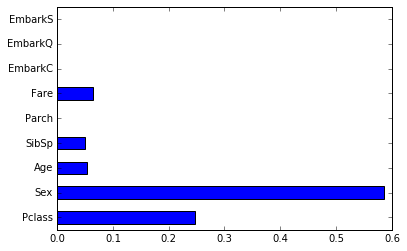

In [9]:
### Feature importance ###

feat_importances = pd.Series(clf.feature_importances_,
                             index=titanic[['Pclass', 'Sex', 'Age', 'SibSp', 
                                            'Parch', 'Fare', 'EmbarkC', 
                                            'EmbarkQ', 'EmbarkS']].columns)
feat_importances.plot(kind='barh')